# RANDOM FOREST


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger les données
data = pd.read_csv('dataset_Valide_Final2.csv', sep=';', encoding='utf-8')

# Prétraitement des données
data['Response Timing?'] = data['Response Timing?'].map({'No': 0, 'Yes': 1})
print(data.columns)
X = data.drop(['Response Timing?','Product'], axis=1)  # features
y = data['Response Timing?']  # target variable

data.head()


Index(['DR', 'Product', 'Issue', 'Company', 'Submitted Via',
       'Date Sent to Company', 'Consumer Response', 'Response Timing?',
       'Complaint ID', 'State', 'Postal Code', 'Complaint Description',
       'Consumer Consent', 'Contested by Consumer', 'Keywords',
       'Company Response', 'Sub-issue', 'Sub-product'],
      dtype='object')


,DR,Product,Issue,Company,Submitted Via,Date Sent to Company,Consumer Response,Response Timing?,Complaint ID,State,Postal Code,Complaint Description,Consumer Consent,Contested by Consumer,Keywords,Company Response,Sub-issue,Sub-product
0,07/29/2013,Consumer Loan,Managing the loan or lease,Wells Fargo & Company,Phone,07/30/2013,Closed with explanation,1,468882,VA,24540,Consumer Loan,Other,No,Older American,Company chooses not to provide a public response,Debt is not mine,Vehicle loan
1,07/29/2013,Bank account or service,Using a debit or ATM card,Wells Fargo & Company,Web,07/31/2013,Closed with explanation,1,468889,CA,95992,Bank account or service,Other,No,Older American,Company chooses not to provide a public response,Debt is not mine,Checking account
2,07/29/2013,Bank account or service,"Account opening, closing, or management",Santander Bank US,Fax,07/31/2013,Closed,1,468879,NY,10065,Bank account or service,Other,No,Older American,Company has responded to the consumer and the ...,Debt is not mine,Checking account
3,07/29/2013,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,Web,07/30/2013,Closed with explanation,1,468949,GA,30084,Bank account or service,Other,No,Older American,Company chooses not to provide a public response,Debt is not mine,Checking account
4,07/29/2013,Mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,Web,07/30/2013,Closed with explanation,1,475823,CT,06106,Mortgage,Other,No,Older American,Company believes it acted appropriately as aut...,Debt is not mine,Conventional fixed mortgage


In [86]:

# Conversion des variables catégorielles en variables binaires
X = pd.get_dummies(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:

# Conversion des variables catégorielles en variables binaires
X = pd.get_dummies(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9820395130712433


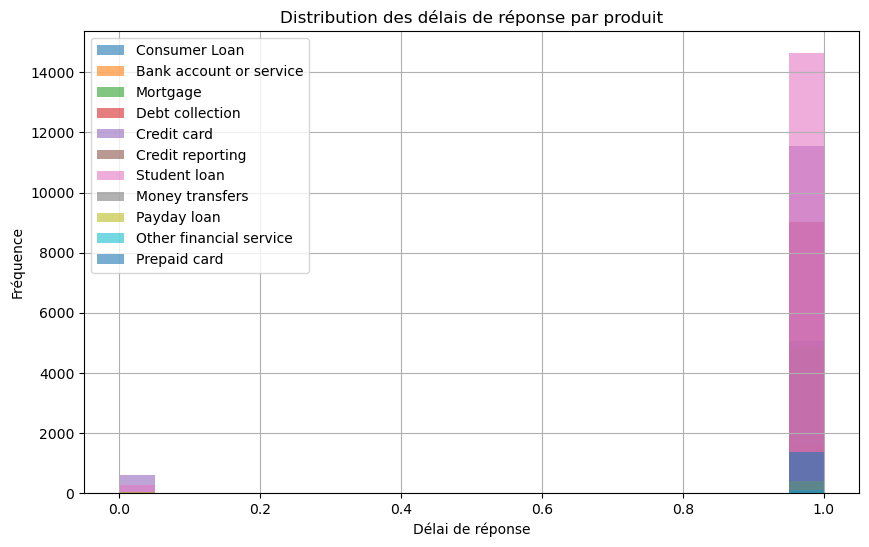

In [88]:
import matplotlib.pyplot as plt
# Sélectionner les colonnes pertinentes
data = data[['Product', 'Response Timing?']]

# Supprimer les valeurs manquantes
data.dropna(inplace=True)

# Visualiser les délais de réponse par produit
plt.figure(figsize=(10, 6))
data.groupby('Product')['Response Timing?'].hist(alpha=0.6, bins=20)
plt.title('Distribution des délais de réponse par produit')
plt.xlabel('Délai de réponse')
plt.ylabel('Fréquence')
plt.legend(data['Product'].unique())
plt.show()

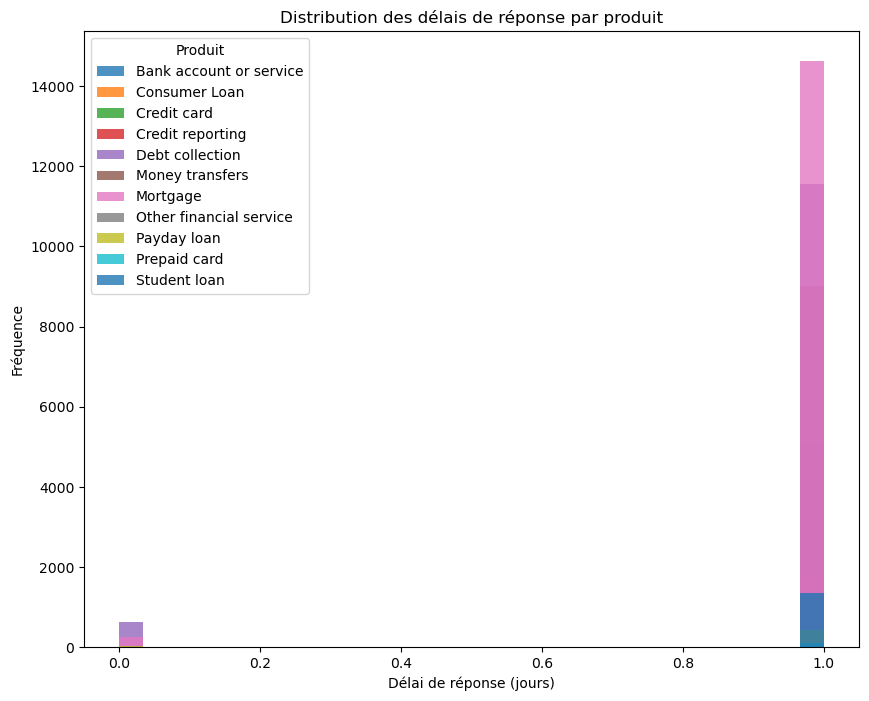

In [89]:
# Tracer l'histogramme
plt.figure(figsize=(10, 8))
data.groupby('Product')['Response Timing?'].plot(kind='hist', alpha=0.8, bins=30, legend=True)
plt.title('Distribution des délais de réponse par produit')
plt.xlabel('Délai de réponse (jours)')
plt.ylabel('Fréquence')
plt.legend(title='Produit')
plt.show()


In [92]:
data.head()

,Product,Response Timing?
0,Consumer Loan,0
1,Bank account or service,0
2,Bank account or service,0
3,Bank account or service,0
4,Mortgage,0
